In [1]:
import os

#add the root directory
os.chdir('../')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from loader import *
import h5py
import matplotlib.ticker as ticker
import matplotlib.transforms as transforms
import matplotlib.lines as mlines
from PCAfold import normalized_variance_derivative, cost_function_normalized_variance_derivative
import re
from matplotlib import gridspec
import matplotlib.cm as cm

<h2> Effect of using log of QoI

In [ ]:
#Tr0D-2h
MSEwithoutLog = [20.652, 18.289, 11.85, 19.438, 0.11, 19.384, 20.156, 19.043, 11.93, 12.189]
costwithoutLog = [3.07404, 2.31548, 5.2886, 2.85725, 0.90858, 2.55701, 3.68854, 2.30364, 5.45962, 5.41902]

MSE_2q = [0.02, 0.017, 0.017, 0.021, 0.019, 0.016, 0.018, 0.016, 0.019, 0.018]
cost_2q = [0.36459, 0.36847, 0.36461, 0.35516, 0.35816, 0.36534, 0.36124, 0.37773, 0.35894, 0.37487]

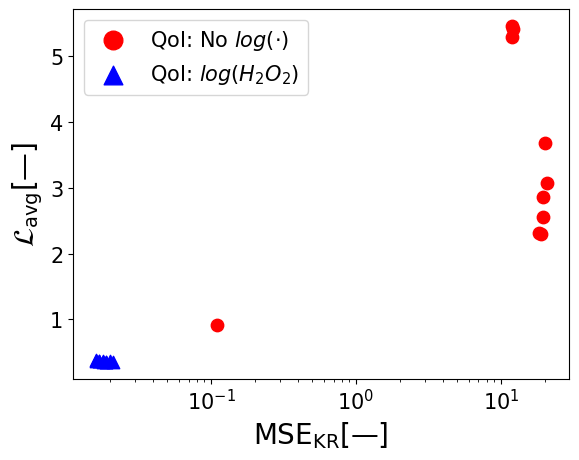

In [5]:
save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect log QoI/"
name = f"cost avg and MSE - Tr0D-2h and Tr0D-2q - 0D - 10 seeds.png"

plt.scatter(MSEwithoutLog, costwithoutLog, color = "Red", label = r"QoI: No $log(\cdot)$", s=80)
plt.scatter(MSE_2q, cost_2q, color = "blue", label = r"QoI: $log(H_2O_2)$", s=80, marker = "^")
plt.xlabel(r"$\mathrm{MSE}_{\mathrm{KR}}$" + '[\u2014]', fontsize = 20)
plt.ylabel(r'$\mathcal{L}_{\mathrm{avg}}$' + '[\u2014]', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xscale("log")
plt.legend(fontsize = 15, markerscale = 1.5)
plt.savefig(f"{pathSave}{name}", dpi = 300, bbox_inches="tight") if save else None
plt.show()

<h3> Look at the PVsource

In [3]:
path = "data-files/costs/"

costPVsourceWithout = []
costPVsource2q = []

for i in range(10):

    costPVsourceWithout.append(np.load(f"{path}costs_Tr0D-2hBis_s{i}-bw_-6_2_100-p_4-ver_sh_1-dataset_autoignition.npy")[-1])
    costPVsource2q.append(np.load(f"{path}costs_Tr0D-2qBis_s{i}-bw_-6_2_100-p_4-ver_sh_1-dataset_autoignition.npy")[-1])

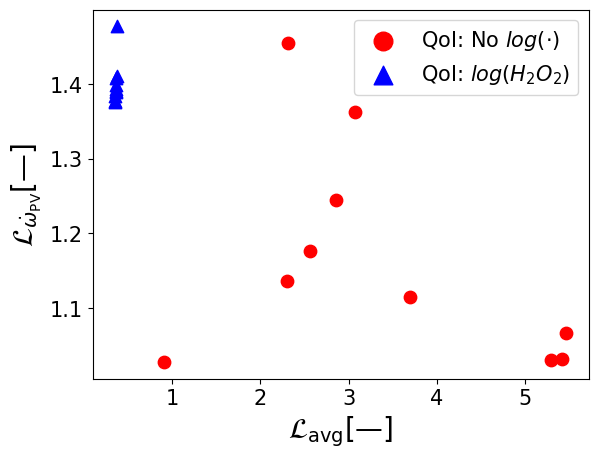

In [7]:
save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect log QoI/cost vs MSE/"
name = f"cost avg and PVsource - 0D - 10 seeds.png"

plt.scatter(costwithoutLog, costPVsourceWithout, color = "Red", label = r"QoI: No $log(\cdot)$", s=80)
plt.scatter(cost_2q, costPVsource2q, color = "blue", label = r"QoI: $log(H_2O_2)$", s=80, marker = "^")
plt.xlabel(r'$\mathcal{L}_{\mathrm{avg}}$' + '[\u2014]', fontsize = 20)
plt.ylabel(r'$\mathcal{L}_{\dot{\omega}_{\mathrm{PV}}}$' + '[\u2014]', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.xscale("log")
plt.legend(fontsize = 15, markerscale = 1.5)
plt.savefig(f"{pathSave}{name}", dpi = 300, bbox_inches="tight") if save else None
plt.show()

<h2> Visualize the PVsource vs PV

<h3> Load the dataset

In [4]:
filename_autoignition = "isochoric-adiabatic-closed-HR-H2-air-lin_Z_0.015_0.035_100-T0_900-"
path_data_autoignition = "data-files/autoignition/"
path_data = "data-files/"

#create all the datasets
mixture_fractions_train = np.loadtxt(f"{path_data_autoignition}{filename_autoignition}mixture-fraction.csv") #1 x nbr_timesteps
mixture_fractions_test = np.loadtxt(f"{path_data_autoignition}{filename_autoignition}mixture-fractions-test-trajectories.csv") #1 x nbr_test_trajectories
state_space_names = np.genfromtxt(f"{path_data_autoignition}{filename_autoignition}state-space-names.csv", delimiter=",", dtype=str)
state_space_train = pd.read_csv(f"{path_data_autoignition}{filename_autoignition}state-space.csv", names = state_space_names)
state_space_source_train = pd.read_csv(f"{path_data_autoignition}{filename_autoignition}state-space-sources.csv", names = state_space_names)
time_train = np.loadtxt(f"{path_data_autoignition}{filename_autoignition}time.csv") #1 x nbr_timesteps

#h5py files
#state_space_test = pd.read_csv(f"{path_data}{filename}state-space.csv", names = state_space_names)
#state_space_source_test = pd.read_csv(f"{path_data}{filename}state-space-sources.csv", names = state_space_names)
print(len(time_train))

241519


<h2> Dhat plots: comparison of the two PVs

In [5]:
path_variance = "data-files/costs/"

name_without = "variance_Tr0D-2h_s0-bw_-6_2_100-dataset_autoignition.npy"
name_with = "variance_Tr0D-2q_s0-bw_-6_2_100-dataset_autoignition.npy"

penalty_function = 'log-sigma-over-peak'
power = 4
vertical_shift = 1

variance_without = np.load(f"{path_variance}{name_without}", allow_pickle=True).item()
variance_with = np.load(f"{path_variance}{name_with}", allow_pickle=True).item()

(derivative_without, bandwidth_values_without, max_derivative_without) = normalized_variance_derivative(variance_without)
(derivative_with, bandwidth_values_with, max_derivative_with) = normalized_variance_derivative(variance_with)

keys = ['H2O2', 'H2O', 'H2', 'HO2', 'N2O', 'NO2', 'NO', 'O2', 'OH', 'T', 'PV1']

costsWithout = cost_function_normalized_variance_derivative(variance_without,
                                                            penalty_function=penalty_function,
                                                            power=power,
                                                            vertical_shift=vertical_shift,
                                                            norm=None)
costsWith = cost_function_normalized_variance_derivative(variance_with,
                                                            penalty_function=penalty_function,
                                                            power=power,
                                                            vertical_shift=vertical_shift,
                                                            norm=None)

C:\Windows\Temp\ipykernel_6200\382661945.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  greys = cm.get_cmap('Greys')


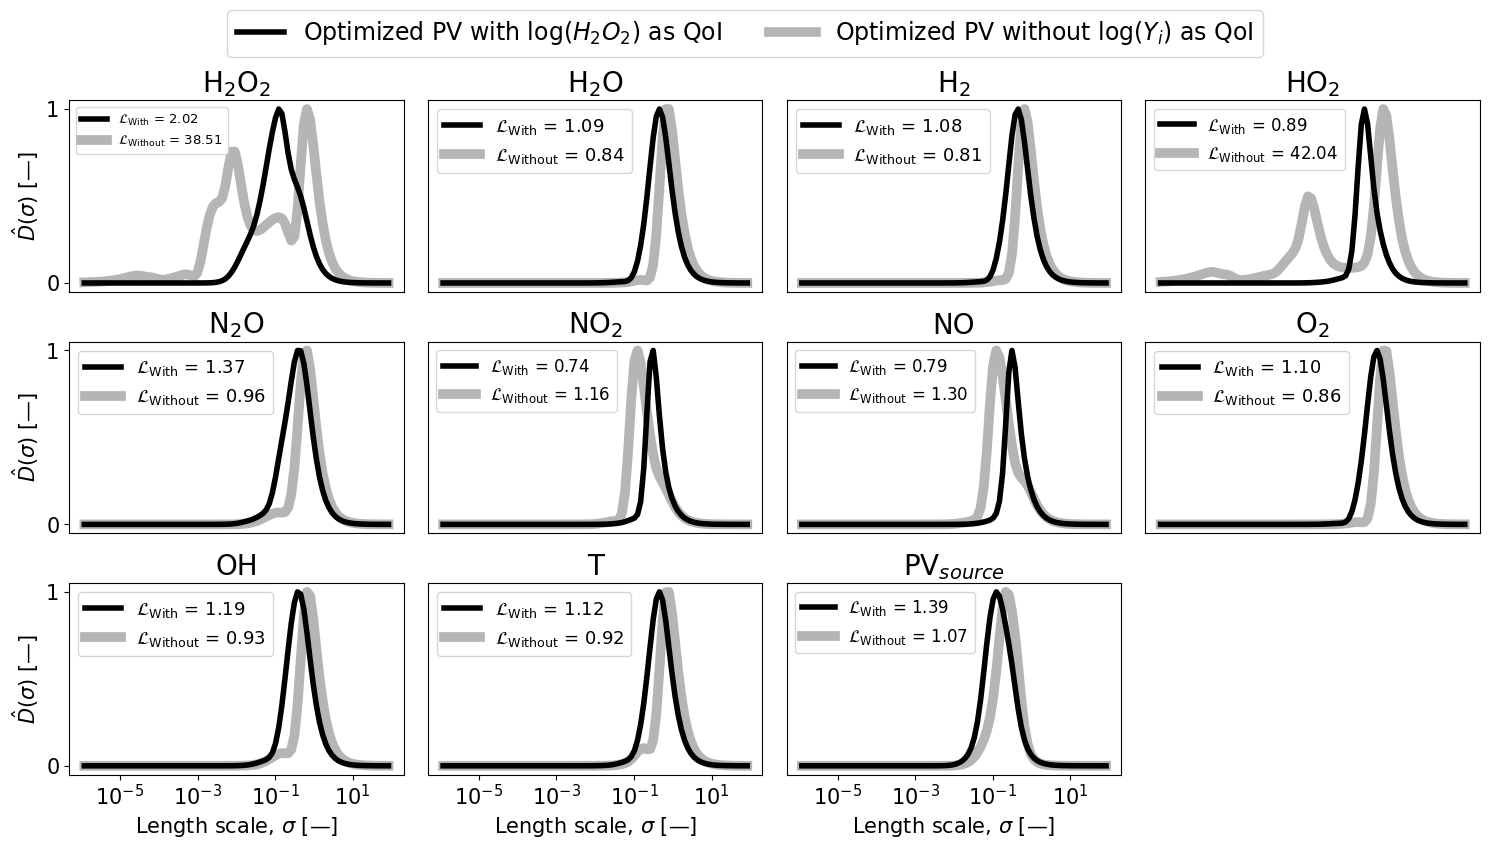

In [6]:
rows, cols = 3,4

save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect log QoI/Dhat plots/"
name = "Dhat without and with log(H2O2) combined - with cost - change title - with = - black.png"
namePdf = "Dhat without and with log(H2O2) combined - with cost - change title - with = - black.pdf"

greys = cm.get_cmap('Greys')

fig, axes = plt.subplots(rows, cols, figsize=(15, 8))  # Define the grid
axes = axes.flatten()
for i, key in enumerate(keys):
    ax = axes[i]
    ax.plot(bandwidth_values_with, derivative_with[key], color = greys(1.0), zorder = 2,
            label = rf'$\mathcal{{L}}_{{\mathrm{{With}}}}$ = {costsWith[i]:.2f}', linewidth = 4)
    ax.plot(bandwidth_values_without, derivative_without[key], color = greys(0.4), zorder = 1,
            label = rf'$\mathcal{{L}}_{{\mathrm{{Without}}}}$ = {costsWithout[i]:.2f}', linewidth = 7, linestyle = "-")
    ax.set_xscale("log")
    if(i>len(keys)-cols):
        ax.tick_params(axis="x", labelsize=15)
        ax.set_xlabel(r"Length scale, $\sigma$"+ " [\u2014]", fontsize = 15)
    else:
        ax.set_xticks([])
    if(i%cols == 0):
        ax.set_yticks([0, 1])
        ax.set_ylabel(r"$\hat{D}(\sigma)$" + " [\u2014]", fontsize = 15)
    else:
        ax.set_yticks([])
    ax.tick_params(axis="y", labelsize=15)
    
    ax.legend(fontsize = 13)
    if(key in ["H2O2"]):
         ax.legend(fontsize = 9.5)
    elif(key in ["HO2", "NO2", "NO", "PV1"]):
         ax.legend(fontsize = 12)

    key = key.replace("2", "$_{2}$").replace("1", "$_{source}$")

    ax.set_title(rf"{key}", fontsize=20)
    


for j in range(len(keys), len(axes)): #disables axes of plots not used
    axes[j].axis("off")

handles, _ = axes[0].get_legend_handles_labels()
labels = ["Optimized PV with log(" + r"$H_2O_2$" + ") as QoI", "Optimized PV without log(" + r"$Y_i$" + ") as QoI"]

fig.legend(
    handles=handles,
    labels = labels,
    fontsize=17,
    loc="upper center",
    ncol=2,
    bbox_to_anchor=(0.5, 1.07)
)

plt.tight_layout()
if(save):
        plt.savefig(f"{pathSave}{name}", dpi = 300, bbox_inches="tight")
        plt.savefig(f"{pathSave}{namePdf}", bbox_inches="tight")
plt.show()

# Dhat plots: comparison with and without NOx as QoI

In [7]:
path_variance = "data-files/costs/"

seed_2v = 0

name_without = f"variance_Tr0D-2v_s{seed_2v}-bw_-6_2_100-dataset_autoignition.npy"
name_with = "variance_Tr0D-2h_s0-bw_-6_2_100-dataset_autoignition.npy"

penalty_function = 'log-sigma-over-peak'
power = 4
vertical_shift = 1

variance_without = np.load(f"{path_variance}{name_without}", allow_pickle=True).item()
variance_with = np.load(f"{path_variance}{name_with}", allow_pickle=True).item()

(derivative_without, bandwidth_values_without, max_derivative_without) = normalized_variance_derivative(variance_without)
(derivative_with, bandwidth_values_with, max_derivative_with) = normalized_variance_derivative(variance_with)

keys = ['H2O2', 'H2O', 'H2', 'HO2', 'N2O', 'NO2', 'NO', 'O2', 'OH', 'T', 'PV1']

costsWithout = cost_function_normalized_variance_derivative(variance_without,
                                                            penalty_function=penalty_function,
                                                            power=power,
                                                            vertical_shift=vertical_shift,
                                                            norm=None)
costsWith = cost_function_normalized_variance_derivative(variance_with,
                                                            penalty_function=penalty_function,
                                                            power=power,
                                                            vertical_shift=vertical_shift,
                                                            norm=None)

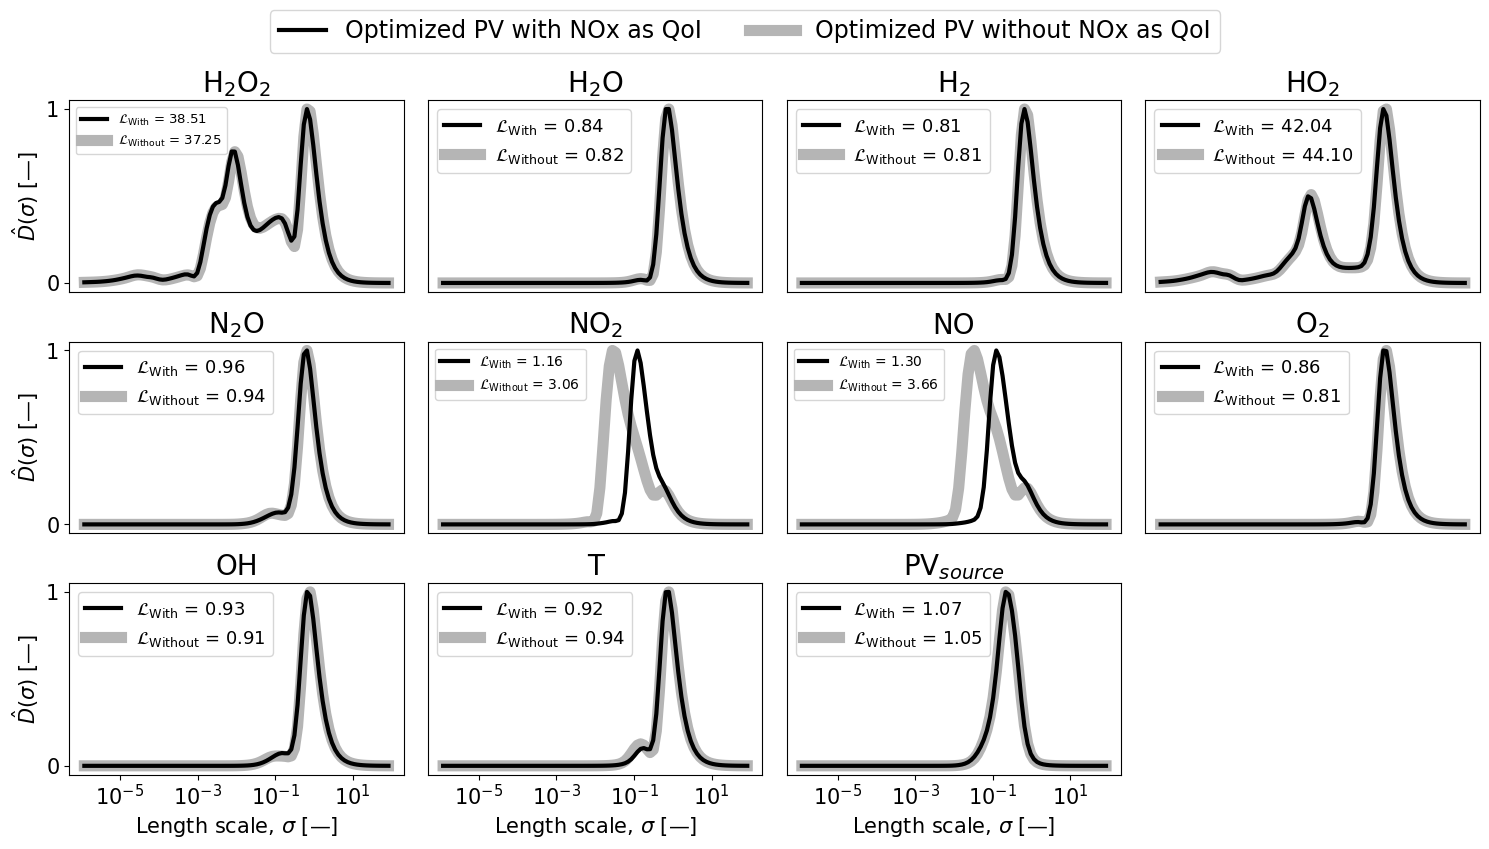

In [8]:
rows, cols = 3,4

save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect QoI NOx/Dhat plots/"
name = f"Dhat without and with NOx combined - 0D-2v_s{seed_2v} vs 0D-2h_s0 - with cost - change title - with = - black.png"
namePdf = f"Dhat without and with NOx combined - 0D-2v_s{seed_2v} vs 0D-2h_s0 - with cost - change title - with = - black.pdf"

fig, axes = plt.subplots(rows, cols, figsize=(15, 8))  # Define the grid
axes = axes.flatten()
for i, key in enumerate(keys):
    ax = axes[i]
    ax.plot(bandwidth_values_with, derivative_with[key], color = greys(1.0), zorder = 2,
            label = rf'$\mathcal{{L}}_{{\mathrm{{With}}}}$ = {costsWith[i]:.2f}', linewidth = 3)
    ax.plot(bandwidth_values_without, derivative_without[key], color = greys(0.4), zorder = 1,
            label = rf'$\mathcal{{L}}_{{\mathrm{{Without}}}}$ = {costsWithout[i]:.2f}', linewidth = 8, linestyle = "-")
    ax.set_xscale("log")
    if(i>len(keys)-cols):
        ax.tick_params(axis="x", labelsize=15)
        ax.set_xlabel(r"Length scale, $\sigma$"+ " [\u2014]", fontsize = 15)
    else:
        ax.set_xticks([])
    if(i%cols == 0):
        ax.set_yticks([0, 1])
        ax.set_ylabel(r"$\hat{D}(\sigma)$" + " [\u2014]", fontsize = 15)
    else:
        ax.set_yticks([])
    ax.tick_params(axis="y", labelsize=15)
    
    ax.legend(fontsize = 13)
    if(key == "H2O2"):
         ax.legend(fontsize = 9.5)
    elif(key == "NO2" or key == "NO"):
         ax.legend(fontsize = 10)

    key = key.replace("2", "$_{2}$").replace("1", "$_{source}$")

    ax.set_title(rf"{key}", fontsize=20)
    


for j in range(len(keys), len(axes)): #disables axes of plots not used
    axes[j].axis("off")

optimized_handle = mlines.Line2D([], [], color='tab:blue', linewidth=5, label="Optimized PV with NOx as QoI")
heuristic_handle = mlines.Line2D([], [], color='tab:orange', linewidth=5, linestyle='--', label="Optimized PV without NOx as QoI")

handles, _ = axes[0].get_legend_handles_labels()
labels = ["Optimized PV with NOx as QoI", "Optimized PV without NOx as QoI"]

fig.legend(
    handles=handles,
    labels = labels,
    fontsize=17,
    loc="upper center",
    ncol=2,
    bbox_to_anchor=(0.5, 1.07)
)

plt.tight_layout()
if(save):
        plt.savefig(f"{pathSave}{namePdf}", bbox_inches="tight")
plt.show()